# Merchant segmentation

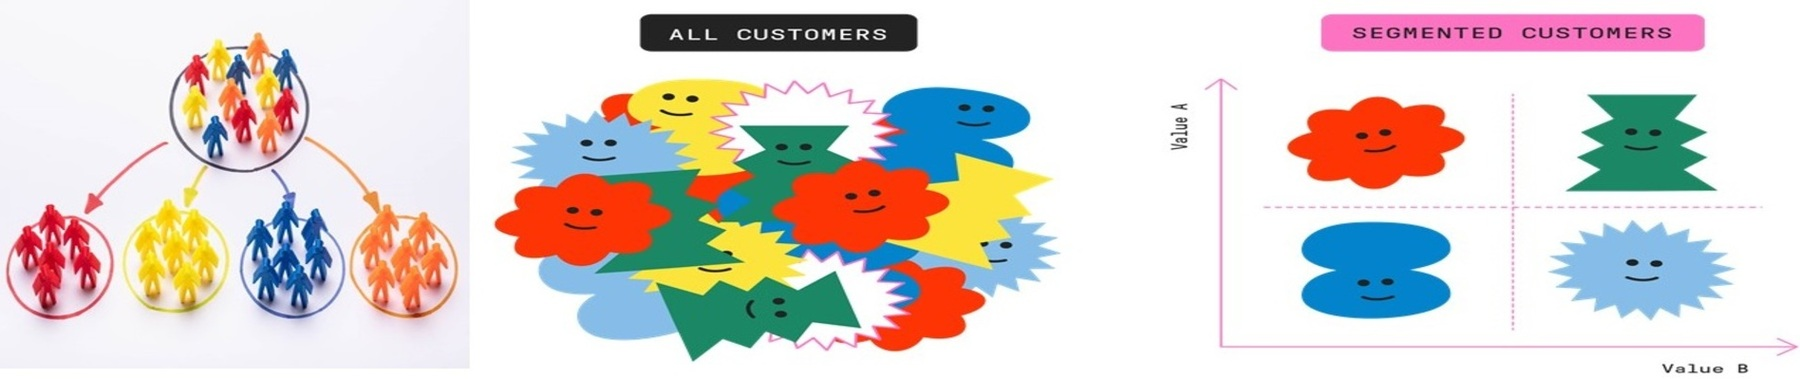

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Target:
# create a customer segmentation model to recommend the best merchants for each user as targetted offers
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [60]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd  # Powerful library for data analysis and manipulation

# Interactive data visualization
import plotly_express as px  # High-level library for creating interactive visualizations
import plotly.graph_objects as go  # Lower-level library for more control over visualizations

# Numerical operations
import numpy as np  # Essential library for numerical computations and array operations

# Warning control
import warnings  # To manage and suppress warnings during code execution

# Statistical data visualization
import seaborn as sns  # Library for creating informative and aesthetic statistical graphics

# Static data visualization
import matplotlib.pyplot as plt  # Foundational library for creating static plots
plt.style.use('ggplot')  # Set a visually appealing style for plots

# Model persistence
import joblib  # Library for saving and loading machine learning models

# Outlier detection
from datasist.structdata import detect_outliers  # Function for identifying potential outliers

# Suppress warnings
warnings.filterwarnings('ignore')  # Prevent warnings from being displayed, potentially improving readability

from sklearn.preprocessing import KBinsDiscretizer

In [22]:
# Read the 'Cleaned_Data_Merchant_Name.csv' file into a pandas DataFrame and store it in the variable 'df'
df = pd.read_csv('Cleaned_Data_Merchant_Name - Cleaned_Data_Merchant_Name.csv')

# Display the DataFrame to view its contents
df

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43667         1    3050    305.0       27            27                 F&B   
43668         1    3120    312.0       31            31                 F&B   
43669         1    1200    120.0       25            25                 F&B   
43670         1      20      2.0        2             2               Other   
43671         2      20      2.0        2             2               Other   

       User_Id                Mer_Name  
0        21053         Shankar Traders  
1        26472         Shankar Traders  
2        26472         Shankar Traders  
3        27075         Shankar Traders  
4        27417         Shankar Traders  
...        ...                     ...  
43667    26865  Cuttack Curtain Corner  
43668    27128  Cuttack Curtain Corner  
43669    28814  Cuttack Curtain Corner  
43670    29107    Rourkela Rice Retail  
43671    29107    Rourkela Rice Retail  

[43672 rows x 8 columns]

 # Columns Description

## Trx_Rank --> The number of transactions of this user with this merchant
## Points --> The Number of points redeemed in this transaction
## Trx_Vlu--> the equivalent values in pounds to the redeemed points
## Trx_Age--> How many days this transaction was done
## Customer_Age--> the number of days from which the user made his last transaction ever
## Category In English --> The category of the merchant
## User_Id
## Mer_Name

In [23]:
# This function 'summary' takes a DataFrame 'df' as input and generates a summary report for the data.
# It calculates and displays information such as the shape of the DataFrame, data types, missing values,
# unique values, basic descriptive statistics (min, max, mean), and the first three values of the dataset.
# The summary is returned as a DataFrame.

def summary(df):
    # Display the shape of the DataFrame
    print(f'data shape: {df.shape}')

    # Create a summary DataFrame with data types
    summ = pd.DataFrame(df.dtypes, columns=['data type'])

    # Calculate and add the number of missing values
    summ['#missing'] = df.isnull().sum().values

    # Calculate and add the percentage of missing values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100

    # Calculate and add the number of unique values
    summ['#unique'] = df.nunique().values

    # Create a DataFrame with basic descriptive statistics
    desc = pd.DataFrame(df.describe(include='all').transpose())

    # Add minimum, maximum, mean, and the first three values to the summary DataFrame
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['mean'] = desc['mean'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values

    # Return the summary DataFrame
    return summ

# To use this function and generate a summary of your DataFrame 'df', you can call it like this:
summary(df)


data shape: (43672, 8)


data type  #missing  %missing  #unique   min       max  \
Trx_Rank                int64         0       0.0       17   1.0      17.0   
Points                  int64         0       0.0     5911  20.0  263800.0   
Trx_Vlu               float64         0       0.0     5911   2.0   26380.0   
Trx_Age                 int64         0       0.0      573   1.0     698.0   
Customer_Age            int64         0       0.0      527   1.0     682.0   
Category In English    object         0       0.0        7   NaN       NaN   
User_Id                 int64         0       0.0    33457   0.0   33518.0   
Mer_Name               object         0       0.0       56   NaN       NaN   

                             mean      first value     second value  
Trx_Rank                 1.265227                1                1  
Points                3312.249748            20140            11200  
Trx_Vlu                331.224975           2014.0           1120.0  
Trx_Age                185.186664              362              371  
Customer_Age           144.027844              362              368  
Category In English           NaN          Fashion          Fashion  
User_Id              17173.411889            21053            26472  
Mer_Name                      NaN  Shankar Traders  Shankar Traders

In [24]:
# Check Duplicated
df.duplicated().sum()

0

# Columns Handling


## Trx_Rank

In [25]:
df['Trx_Rank'].value_counts()

Trx_Rank
1     36348
2      5079
3      1301
4       497
5       200
6       101
7        57
8        33
9        21
10       13
11       10
12        6
13        2
14        1
15        1
16        1
17        1
Name: count, dtype: int64

In [26]:
df['Trx_Rank'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

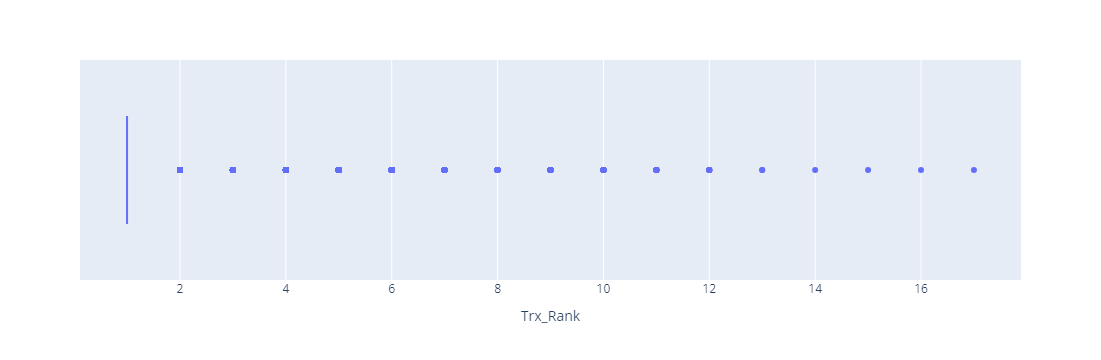

In [27]:
px.box(data_frame=df , x = "Trx_Rank")

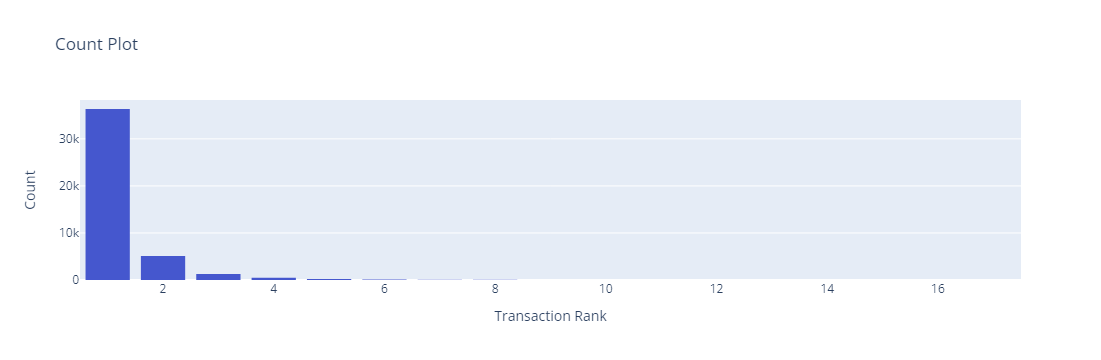

In [28]:
# Define color palette
pal = ["#4557CE", "#FF6E33"]

# Create the count plot
fig = px.histogram(df, x='Trx_Rank', color_discrete_sequence=pal, title='Count Plot',
                   labels={'Trx_Rank': 'Transaction Rank', 'count': 'Count'})

# Update layout for better visualization
fig.update_layout(
    bargap=0.2,  # Set the gap between bars
    xaxis=dict(title='Transaction Rank'),  # Set x-axis label
    yaxis=dict(title='Count'),  # Set y-axis label
    showlegend=False  # Hide legend
)

# Show the plot
fig.show()

## Points

In [29]:
df['Points'].describe()

count     43672.000000
mean       3312.249748
std        5756.374137
min          20.000000
25%        1220.000000
50%        1893.500000
75%        3100.000000
max      263800.000000
Name: Points, dtype: float64

<Axes: xlabel='Points', ylabel='Density'>

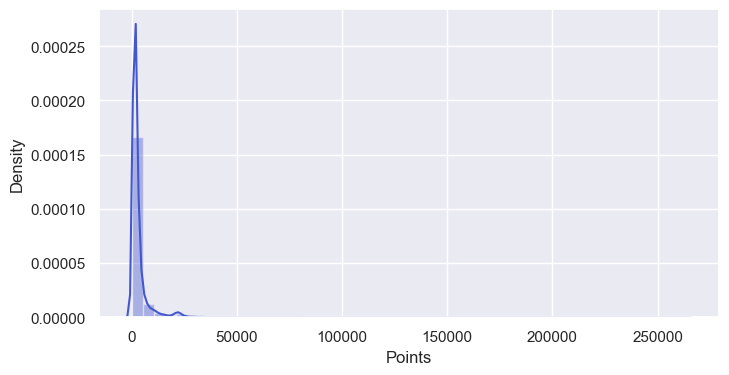

In [30]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['Points'], color = '#4557CE')

<Axes: xlabel='Points', ylabel='Density'>

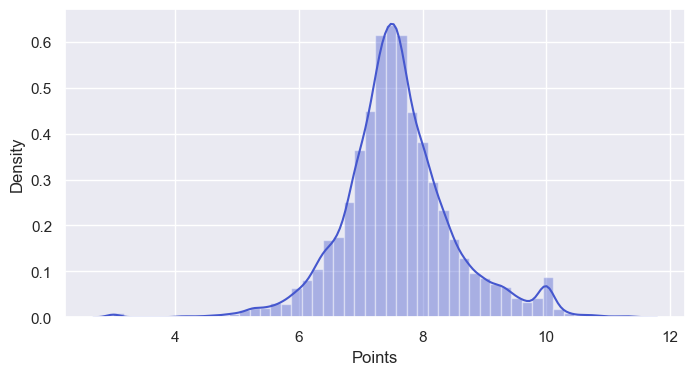

In [35]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(np.log(df['Points']), color = '#4557CE')

In [32]:
df[df["Points"] == df["Points"].max()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
21907         8  263800  26380.0       81            74             Grocery   

       User_Id               Mer_Name  
21907    19390  Rajasthan Handicrafts

In [33]:
df[df["User_Id"] == 19390]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
21900         1     620     62.0      262            74             Grocery   
21901         2    2000    200.0      102            74             Grocery   
21902         3     660     66.0      102            74             Grocery   
21903         4    2000    200.0      101            74             Grocery   
21904         5    3000    300.0       97            74             Grocery   
21905         6   22400   2240.0       96            74             Grocery   
21906         7    1540    154.0       96            74             Grocery   
21907         8  263800  26380.0       81            74             Grocery   
21908         9    2638    263.8       81            74             Grocery   
21909        10    1880    188.0       74            74             Grocery   
33110         1   60000   6000.0       79            74         Electronics   
33111         2   80000   8000.0       79            74         Electronics   
33112         3   80000   8000.0       79            74         Electronics   
33113         4   80000   8000.0       79            74         Electronics   
33114         5   80000   8000.0       79            74         Electronics   
33115         6   80000   8000.0       79            74         Electronics   
33116         7   80000   8000.0       79            74         Electronics   
33117         8   80000   8000.0       79            74         Electronics   
33118         9   80000   8000.0       79            74         Electronics   
33119        10   80000   8000.0       79            74         Electronics   
33120        11   80000   8000.0       79            74         Electronics   
33121        12   80000   8000.0       79            74         Electronics   
33122        13   80000   8000.0       79            74         Electronics   
33123        14   80000   8000.0       79            74         Electronics   
33124        15   80000   8000.0       79            74         Electronics   
33125        16   80000   8000.0       79            74         Electronics   
33126        17   73380   7338.0       79            74         Electronics   
34876         1   11940   1194.0       82            74             Fashion   
34877         2    5980    598.0       82            74             Fashion   

       User_Id               Mer_Name  
21900    19390  Rajasthan Handicrafts  
21901    19390  Rajasthan Handicrafts  
21902    19390  Rajasthan Handicrafts  
21903    19390  Rajasthan Handicrafts  
21904    19390  Rajasthan Handicrafts  
21905    19390  Rajasthan Handicrafts  
21906    19390  Rajasthan Handicrafts  
21907    19390  Rajasthan Handicrafts  
21908    19390  Rajasthan Handicrafts  
21909    19390  Rajasthan Handicrafts  
33110    19390      Thane Tea Traders  
33111    19390      Thane Tea Traders  
33112    19390      Thane Tea Traders  
33113    19390      Thane Tea Traders  
33114    19390      Thane Tea Traders  
33115    19390      Thane Tea Traders  
33116    19390      Thane Tea Traders  
33117    19390      Thane Tea Traders  
33118    19390      Thane Tea Traders  
33119    19390      Thane Tea Traders  
33120    19390      Thane Tea Traders  
33121    19390      Thane Tea Traders  
33122    19390      Thane Tea Traders  
33123    19390      Thane Tea Traders  
33124    19390      Thane Tea Traders  
33125    19390      Thane Tea Traders  
33126    19390      Thane Tea Traders  
34876    19390   Agra Appliance Arena  
34877    19390   Agra Appliance Arena

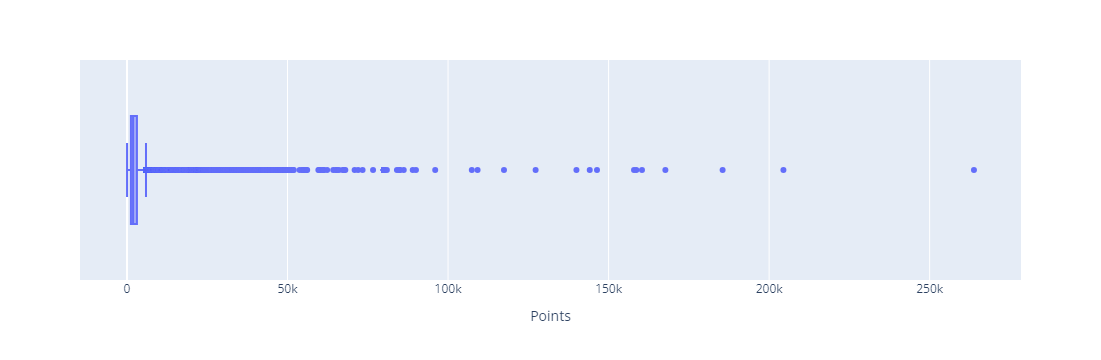

In [31]:
px.box(data_frame=df , x = "Points")

In [34]:
idx_out = df[df["Points"] > 100000].index
df.drop(idx_out , axis = 0 , inplace = True)
df.reset_index(drop = True , inplace = True)

## Trx_Vlu

In [36]:
df['Trx_Vlu'].describe()

count    43658.000000
mean       326.314401
std        501.118854
min          2.000000
25%        122.000000
50%        189.050000
75%        310.000000
max       9600.000000
Name: Trx_Vlu, dtype: float64

In [37]:
df[df['Trx_Vlu']==2]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
11            1      20      2.0       39             1                 F&B   
24            1      20      2.0      356            27               Other   
2046          1      20      2.0      164            67             Grocery   
2409          2      20      2.0       15             1             Grocery   
3730          1      20      2.0      347           303             Grocery   
...         ...     ...      ...      ...           ...                 ...   
43637         1      20      2.0       67            67                 F&B   
43642         2      20      2.0       56             1                 F&B   
43643         4      20      2.0       56             1                 F&B   
43656         1      20      2.0        2             2               Other   
43657         2      20      2.0        2             2               Other   

       User_Id                Mer_Name  
11       13519          Radha Emporium  
24       24999     Ganpati Enterprises  
2046      9834       Saraswati Fabrics  
2409     11414       Saraswati Fabrics  
3730     17844       Saraswati Fabrics  
...        ...                     ...  
43637     9834  Cuttack Curtain Corner  
43642    13519  Cuttack Curtain Corner  
43643    13519  Cuttack Curtain Corner  
43656    29107    Rourkela Rice Retail  
43657    29107    Rourkela Rice Retail  

[67 rows x 8 columns]

<Axes: xlabel='Trx_Vlu', ylabel='Density'>

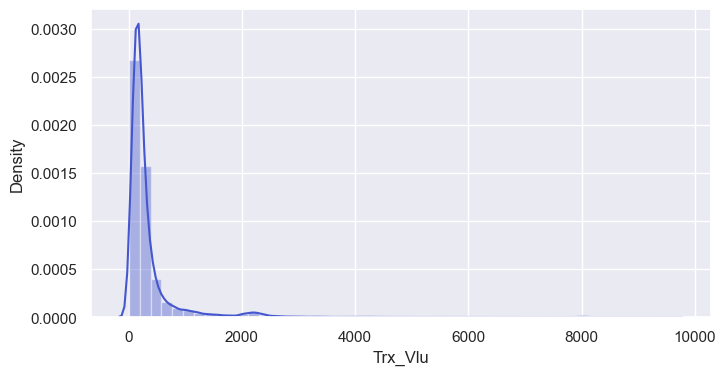

In [38]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['Trx_Vlu'], color = '#4557CE')

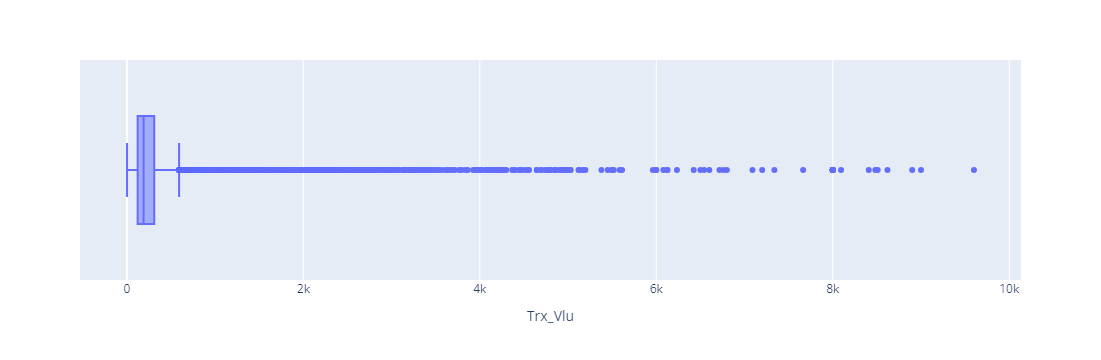

In [39]:
px.box(data_frame=df , x='Trx_Vlu')

In [40]:
df[df['Trx_Vlu']>8000]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
12455         7   84080   8408.0      102            12             Grocery   
14147         1   85090   8509.0       41            41             Grocery   
17672         7   90000   9000.0      272            41             Grocery   
19864         1   86200   8620.0      293            20             Grocery   
19924         1   96000   9600.0      321           321             Grocery   
21114         3   84820   8482.0      113            41             Grocery   
38837         1   89000   8900.0      325            41         Electronics   
38976         1   80940   8094.0       86            86             Fashion   

       User_Id                 Mer_Name  
12455     3478    Rajasthan Handicrafts  
14147     6395    Rajasthan Handicrafts  
17672    12650    Rajasthan Handicrafts  
19864    16228    Rajasthan Handicrafts  
19924    16325    Rajasthan Handicrafts  
21114    18169    Rajasthan Handicrafts  
38837     4952      Gwalior Garden Gear  
38976     3231  Faridabad Footwear Fair

In [41]:
idx_out = df[df["Trx_Vlu"] > 8000].index
df.drop(idx_out , axis = 0 , inplace = True)
df.reset_index(drop = True , inplace = True)

In [42]:
df['log_Trx_Vlu'] = np.log(df['Trx_Vlu'])

<Axes: xlabel='log_Trx_Vlu', ylabel='Density'>

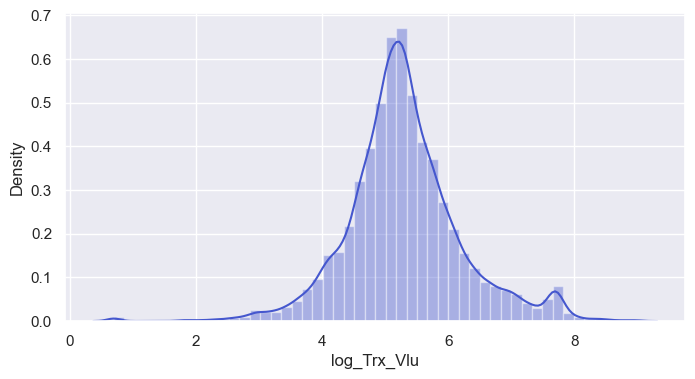

In [43]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['log_Trx_Vlu'], color = '#4557CE')

In [44]:
df['log_Trx_Vlu'].describe()

count    43650.000000
mean         5.301611
std          0.915121
min          0.693147
25%          4.804021
50%          5.241747
75%          5.736572
max          8.987197
Name: log_Trx_Vlu, dtype: float64

## Trx_Age

In [45]:
df['Trx_Age'].describe()

count    43650.000000
mean       185.210034
std        121.992297
min          1.000000
25%         62.000000
50%        203.000000
75%        271.000000
max        698.000000
Name: Trx_Age, dtype: float64

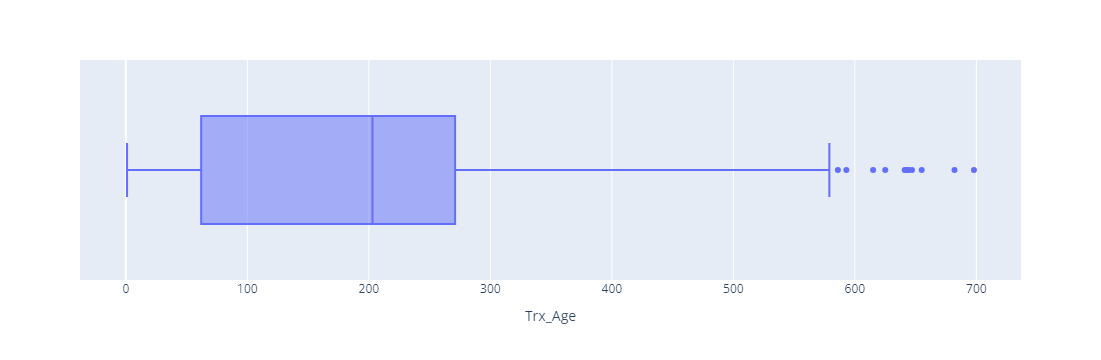

In [46]:
px.box(data_frame=df , x ="Trx_Age")

In [61]:
Binarizer = KBinsDiscretizer(n_bins=30 , encode="ordinal" , strategy="uniform")

In [62]:
df[["Trx_Age_Bins"]] = Binarizer.fit_transform(df[["Trx_Age"]])

In [63]:
df["Trx_Age_Bins"]  = df["Trx_Age_Bins"] + 1

In [64]:
df["Trx_Age_Bins"] = 1/ df["Trx_Age_Bins"]

In [65]:
df["Trx_Age_Bins"] = df["Trx_Age_Bins"] * 100 

In [66]:
df["Trx_Age_Bins"]  = round(df["Trx_Age_Bins"], 2)

In [67]:
df

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43645         1    3050    305.0       27            27                 F&B   
43646         1    3120    312.0       31            31                 F&B   
43647         1    1200    120.0       25            25                 F&B   
43648         1      20      2.0        2             2               Other   
43649         2      20      2.0        2             2               Other   

       User_Id                Mer_Name  log_Trx_Vlu customers_statues  \
0        21053         Shankar Traders     7.607878        not active   
1        26472         Shankar Traders     7.021084        not active   
2        26472         Shankar Traders     6.745236        not active   
3        27075         Shankar Traders     5.288267            active   
4        27417         Shankar Traders     5.480639        not active   
...        ...                     ...          ...               ...   
43645    26865  Cuttack Curtain Corner     5.720312            active   
43646    27128  Cuttack Curtain Corner     5.743003            active   
43647    28814  Cuttack Curtain Corner     4.787492            active   
43648    29107    Rourkela Rice Retail     0.693147            active   
43649    29107    Rourkela Rice Retail     0.693147            active   

       Trx_Age_Bins  
0              6.25  
1              6.25  
2              6.25  
3              4.17  
4              5.56  
...             ...  
43645         50.00  
43646         50.00  
43647         50.00  
43648        100.00  
43649        100.00  

[43650 rows x 11 columns]

In [47]:
df.columns

Index(['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age',
       'Category In English', 'User_Id', 'Mer_Name', 'log_Trx_Vlu'],
      dtype='object')

## Customer_Age

In [48]:
df["Customer_Age"].describe()

count    43650.000000
mean       144.076243
std        114.764470
min          1.000000
25%         34.000000
50%        115.000000
75%        252.000000
max        682.000000
Name: Customer_Age, dtype: float64

In [57]:
df[df['Customer_Age']<=90]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
3             1    1980    198.0      558            34             Fashion   
5             1   16740   1674.0       34            34                 F&B   
6             1    5820    582.0       33            33                 F&B   
8             1    1565    156.5       14            14                 F&B   
9             1    4165    416.5       27            27                 F&B   
...         ...     ...      ...      ...           ...                 ...   
43645         1    3050    305.0       27            27                 F&B   
43646         1    3120    312.0       31            31                 F&B   
43647         1    1200    120.0       25            25                 F&B   
43648         1      20      2.0        2             2               Other   
43649         2      20      2.0        2             2               Other   

       User_Id                Mer_Name  log_Trx_Vlu  
3        27075         Shankar Traders     5.288267  
5         1447          Radha Emporium     7.422971  
6         2709          Radha Emporium     6.366470  
8         7026          Radha Emporium     5.053056  
9        10231          Radha Emporium     6.031886  
...        ...                     ...          ...  
43645    26865  Cuttack Curtain Corner     5.720312  
43646    27128  Cuttack Curtain Corner     5.743003  
43647    28814  Cuttack Curtain Corner     4.787492  
43648    29107    Rourkela Rice Retail     0.693147  
43649    29107    Rourkela Rice Retail     0.693147  

[19808 rows x 9 columns]

In [58]:
def customers_statues(x):
    try:
        if x >= 90:
            return 'not active'
        else:
            return 'active'
    except TypeError:
        # Handle the case where x is not a numeric value
        return 'unknown'

In [ ]:
# Apply the function to create a new column
df['customers_statues'] = df['Customer_Age'].apply(customers_statues)

In [59]:
df['customers_statues'].value_counts()

customers_statues
not active    23951
active        19699
Name: count, dtype: int64

## Category In English

In [49]:
df["Category In English"].value_counts()

Category In English
Grocery            30674
F&B                 7720
Fashion             3332
Health & Beauty     1504
Electronics          227
Transportaion        146
Other                 47
Name: count, dtype: int64

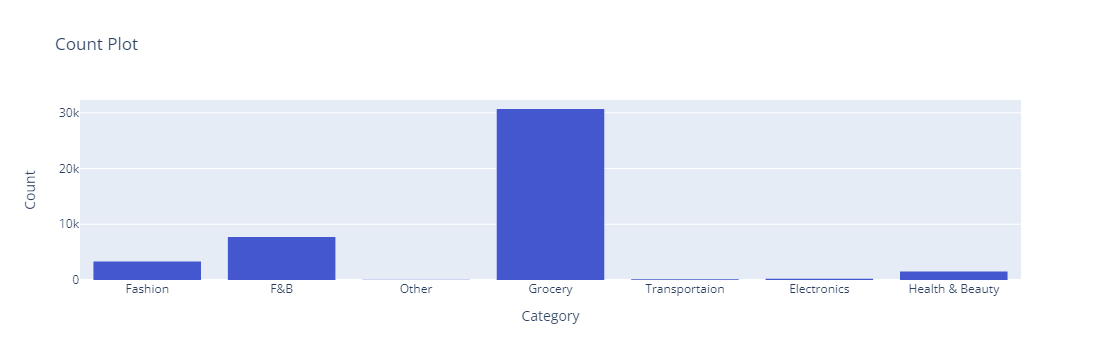

In [51]:
# Create the count plot
fig = px.histogram(df, x='Category In English', color_discrete_sequence=pal, title='Count Plot',
                   labels={'Category In English': 'Category'})

# Update layout for better visualization
fig.update_layout(
    bargap=0.2,  # Set the gap between bars
    xaxis=dict(title='Category'),  # Set x-axis label
    yaxis=dict(title='Count'),  # Set y-axis label
    showlegend=False  # Hide legend
)

# Show the plot
fig.show()

## User_Id

In [52]:
df['User_Id'].value_counts()

User_Id
19390    28
1238     19
13519    19
4360     18
6573     17
         ..
7667      1
7664      1
7661      1
7659      1
16533     1
Name: count, Length: 33454, dtype: int64

## Mer_Name

In [55]:
df['Mer_Name'].value_counts()

Mer_Name
Rajasthan Handicrafts           19341
Saraswati Fabrics                6896
Madurai Music Mania              4269
Jai Hind General Stores          3387
Agra Appliance Arena             2963
Indore Instrument Inn            1470
Amritsar Auto Accessories        1302
Gurgaon Gift Gallery             1012
Mumbai Fashion Hub                907
Pune Perfumes Paradise            553
Faridabad Footwear Fair           310
Varanasi Silk House               157
Krishna Textiles                  146
Ranchi Rug Retail                 134
Gwalior Garden Gear               132
Jodhpur Jewelry Junction          104
Nashik Noodle Niche                88
Bhubaneswar Baker's Boutique       47
Thane Tea Traders                  43
Cuttack Curtain Corner             41
Jamshedpur Jeans Junction          38
Delhi Electronics                  36
Punjabi Furniture Palace           35
Vadodara Vegetables Villa          31
Nagpur Novelty Nook                25
Trichy Tailoring Trends            20
Jai

In [56]:
df['Mer_Name'].unique()

array(['Shankar Traders', 'Radha Emporium', 'Ganpati Enterprises',
       'Saraswati Fabrics', 'Krishna Textiles', 'Gupta Saree Center',
       'Mohan Brothers Mart', 'Jai Hind General Stores',
       'Rajasthan Handicrafts', 'Varanasi Silk House',
       'Delhi Electronics', 'Punjabi Furniture Palace',
       'Mumbai Fashion Hub', 'Chennai Gems and Jewels',
       'Kolkata Carpets Corner', 'Hyderabad Spices Bazaar',
       'Jaipur Pottery Emporium', 'Lucknow Leather World',
       'Ahmedabad Sweet Mart', 'Bangalore Book House',
       'Kochi Kitchenware Kingdom', 'Pune Perfumes Paradise',
       'Goa Grocery Galaxy', 'Patna Paints Palace', 'Nagpur Novelty Nook',
       'Indore Instrument Inn', 'Surat Stationery Studio',
       'Thane Tea Traders', 'Agra Appliance Arena',
       'Coimbatore Cosmetics Castle', 'Vadodara Vegetables Villa',
       'Bhopal Bedding Boutique', 'Amritsar Auto Accessories',
       'Shimla Shoe Shoppe', 'Ranchi Rug Retail',
       'Guwahati Grocery Galleria', '

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# Questions business 

### What is the distribution of transaction ranks in the "Fashion" category?

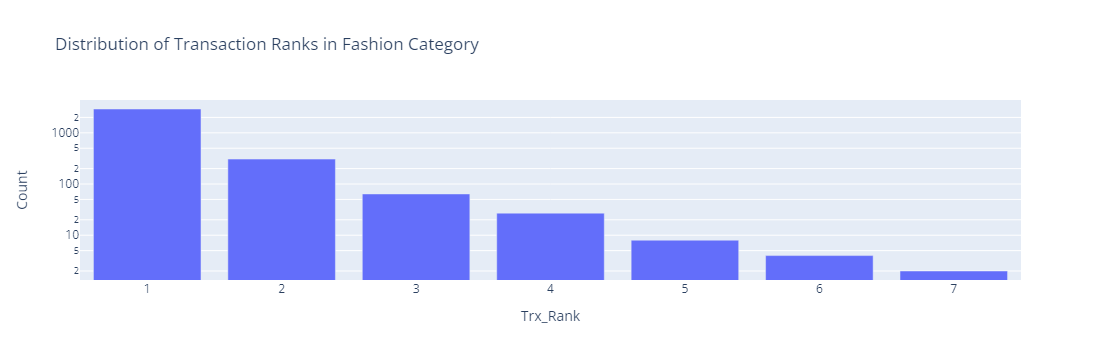

In [89]:
df_fashion = df[df['Category In English'] == 'Fashion']
result_rank = df_fashion.groupby('Trx_Rank').size().reset_index(name='Count')

fig_rank = px.bar(result_rank, x='Trx_Rank', y='Count', title='Distribution of Transaction Ranks in Fashion Category')
fig_rank.update_layout(yaxis_type='log')  # Set the y-axis to log scale

fig_rank.show()

### Are there any merchants that are particularly successful at driving customer loyalty through their rewards program?

In [90]:
df.groupby(['Mer_Name', 'User_Id']).agg({
    'Points': ['sum', 'count']
}).reset_index()

Mer_Name User_Id Points      
                                               sum count
0              Agra Appliance Arena       1   2490     1
1              Agra Appliance Arena       3   1620     1
2              Agra Appliance Arena       6   2700     1
3              Agra Appliance Arena      10   3980     1
4              Agra Appliance Arena      19   2190     1
...                             ...     ...    ...   ...
36349           Varanasi Silk House   33257   2880     1
36350           Varanasi Silk House   33492   9757     1
36351           Varanasi Silk House   33518   1960     1
36352  Vijayawada Vegetable Village   27124   3400     1
36353  Vijayawada Vegetable Village   31330  11600     2

[36354 rows x 4 columns]

### How does the average transaction value vary by merchant category?

In [91]:
grouped = df.groupby('Category In English')['Trx_Vlu'].mean().reset_index()
grouped

Category In English      Trx_Vlu
0         Electronics  1271.767401
1                 F&B   298.499728
2             Fashion   447.053301
3             Grocery   314.491723
4     Health & Beauty   248.889694
5               Other   413.912766
6       Transportaion   365.940411

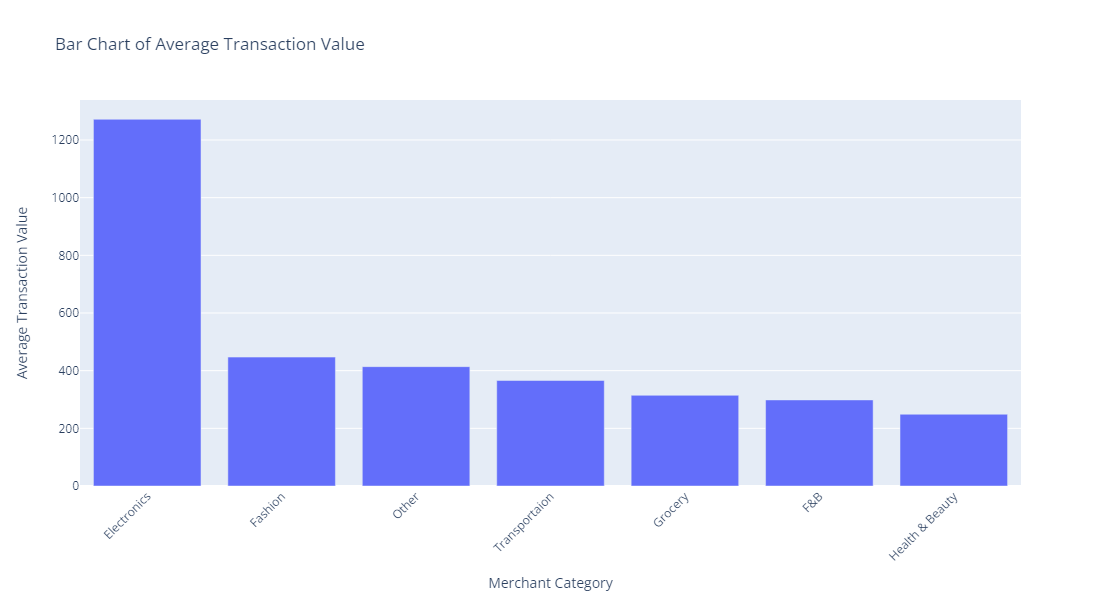

In [92]:
# Sort the data by transaction value
grouped_sorted = grouped.sort_values(by='Trx_Vlu', ascending=False)

# Create the bar chart
fig = px.bar(grouped_sorted, x='Category In English', y='Trx_Vlu',
             labels={'Category In English': 'Merchant Category', 'Trx_Vlu': 'Average Transaction Value'},
             title='Bar Chart of Average Transaction Value',
             width=800, height=600)

# Customize layout
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility

# Show the plot
fig.show()

### What are the most popular merchant for each category among customers?

In [94]:
# group dataset by ['Category In English', 'Mer_Name']
group = df.groupby(['Category In English', 'Mer_Name'])['Trx_Rank'].count().reset_index()
group.columns=['Category In English', 'Mer_Name','count']
group

Category In English                      Mer_Name  count
0          Electronics        Dehradun Dairy Delight      2
1          Electronics            Gupta Saree Center      3
2          Electronics           Gwalior Garden Gear    132
3          Electronics            Mysuru Mobile Mart      2
4          Electronics           Nagpur Novelty Nook     25
5          Electronics             Thane Tea Traders     43
6          Electronics       Trichy Tailoring Trends     20
7                  F&B     Amritsar Auto Accessories   1302
8                  F&B          Bangalore Book House      2
9                  F&B  Bhubaneswar Baker's Boutique     47
10                 F&B       Chennai Gems and Jewels      1
11                 F&B        Cuttack Curtain Corner     41
12                 F&B            Goa Grocery Galaxy      6
13                 F&B          Gurgaon Gift Gallery   1012
14                 F&B       Jai Hind General Stores   3387
15                 F&B       Jaipur Pottery Emporium     19
16                 F&B     Jamshedpur Jeans Junction     38
17                 F&B      Jodhpur Jewelry Junction    104
18                 F&B    Kollam Kitchenware Kingdom      4
19                 F&B            Mumbai Fashion Hub    907
20                 F&B           Nashik Noodle Niche     88
21                 F&B        Pune Perfumes Paradise    553
22                 F&B      Punjabi Furniture Palace     35
23                 F&B                Radha Emporium     11
24                 F&B            Raipur Rice Retail      2
25                 F&B      Udaipur Utensil Universe      4
26                 F&B           Varanasi Silk House    157
27             Fashion          Agra Appliance Arena   2963
28             Fashion       Bhopal Bedding Boutique      2
29             Fashion   Coimbatore Cosmetics Castle      1
30             Fashion             Delhi Electronics     36
31             Fashion       Faridabad Footwear Fair    310
32             Fashion     Kanpur Kitchen Appliances     10
33             Fashion            Noida Novelty Nook      1
34             Fashion           Patna Paints Palace      3
35             Fashion               Shankar Traders      5
36             Fashion            Shimla Shoe Shoppe      1
37             Grocery     Guwahati Grocery Galleria      3
38             Grocery           Madurai Music Mania   4269
39             Grocery         Rajasthan Handicrafts  19341
40             Grocery             Ranchi Rug Retail    134
41             Grocery             Saraswati Fabrics   6896
42             Grocery     Vadodara Vegetables Villa     31
43     Health & Beauty       Hyderabad Spices Bazaar      8
44     Health & Beauty         Indore Instrument Inn   1470
45     Health & Beauty         Lucknow Leather World     14
46     Health & Beauty           Mohan Brothers Mart      6
47     Health & Beauty   Thiruvananthapuram Toy Town      3
48     Health & Beauty  Vijayawada Vegetable Village      3
49               Other          Ahmedabad Sweet Mart     12
50               Other           Ganpati Enterprises     16
51               Other     Kochi Kitchenware Kingdom     12
52               Other        Kolkata Carpets Corner      3
53               Other          Rourkela Rice Retail      2
54               Other       Surat Stationery Studio      2
55       Transportaion              Krishna Textiles    146

In [95]:
# Sort the data by category and transaction count, and keep only the top merchant for each category
top_merchants = group.sort_values(['Category In English', 'count'], ascending=False).groupby('Category In English').first()
top_merchants

Mer_Name  count
Category In English                                
Electronics              Gwalior Garden Gear    132
F&B                  Jai Hind General Stores   3387
Fashion                 Agra Appliance Arena   2963
Grocery                Rajasthan Handicrafts  19341
Health & Beauty        Indore Instrument Inn   1470
Other                    Ganpati Enterprises     16
Transportaion               Krishna Textiles    146

### Which customers are most valuable to us in terms of total transaction value and points redeemed?

In [96]:
grouped = df.groupby('User_Id')['Points'].sum().reset_index()
grouped

User_Id  Points
0            0    4427
1            1    2490
2            2    3000
3            3    1620
4            4     700
...        ...     ...
33449    33514    5940
33450    33515     480
33451    33516    1320
33452    33517    2100
33453    33518    5680

[33454 rows x 2 columns]

In [97]:
# Sort the data by transaction value and points redeemed, and keep only the top customers
top_customers = grouped.sort_values('Points', ascending=False).head(10)
top_customers

User_Id   Points
19373    19390  1388038
3473      3478   290861
4354      4360   240882
12640    12650   238294
10807    10817   229228
8145      8154   204442
16874    16889   195680
8581      8590   194965
1236      1238   194458
4567      4573   184900

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# R||F||M analysis

In [68]:
pivot_frequency = pd.pivot_table(data=df , index = "User_Id" , columns = "Category In English" , values = "Trx_Rank" , aggfunc=len)

In [69]:
pivot_Recency = pd.pivot_table(data=df , index = "User_Id" , columns = "Category In English" , values = "Trx_Age_Bins" , aggfunc=max)

In [70]:
pivot_Montery = pd.pivot_table(data=df , index = "User_Id" , columns = "Category In English" , values = "Trx_Vlu" , aggfunc=sum)

In [71]:
pivot_frequency = pivot_frequency.add_suffix("_Frequency")
pivot_Recency = pivot_Recency.add_suffix("_Recency")
pivot_Montery = pivot_Montery.add_suffix("_Montery")

In [72]:
pivot_total = pd.concat([pivot_frequency , pivot_Montery , pivot_Recency] , axis = 1 )

In [73]:
pivot_total.fillna(0 , inplace = True)

In [74]:
pivot_total

Category In English  Electronics_Frequency  F&B_Frequency  Fashion_Frequency  \
User_Id                                                                        
0                                      0.0            1.0                0.0   
1                                      0.0            0.0                1.0   
2                                      0.0            1.0                0.0   
3                                      0.0            0.0                1.0   
4                                      0.0            0.0                0.0   
...                                    ...            ...                ...   
33514                                  0.0            0.0                0.0   
33515                                  0.0            1.0                0.0   
33516                                  0.0            0.0                0.0   
33517                                  0.0            0.0                0.0   
33518                                  0.0            1.0                0.0   

Category In English  Grocery_Frequency  Health & Beauty_Frequency  \
User_Id                                                             
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  1.0                        0.0   
...                                ...                        ...   
33514                              3.0                        0.0   
33515                              0.0                        0.0   
33516                              1.0                        0.0   
33517                              1.0                        0.0   
33518                              2.0                        0.0   

Category In English  Other_Frequency  Transportaion_Frequency  \
User_Id                                                         
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   
...                              ...                      ...   
33514                            0.0                      0.0   
33515                            0.0                      0.0   
33516                            0.0                      0.0   
33517                            0.0                      0.0   
33518                            0.0                      0.0   

Category In English  Electronics_Montery  F&B_Montery  Fashion_Montery  ...  \
User_Id                                                                 ...   
0                                    0.0        442.7              0.0  ...   
1                                    0.0          0.0            249.0  ...   
2                                    0.0        300.0              0.0  ...   
3                                    0.0          0.0            162.0  ...   
4                                    0.0          0.0              0.0  ...   
...                                  ...          ...              ...  ...   
33514                                0.0          0.0              0.0  ...   
33515                                0.0         48.0              0.0  ...   
33516                                0.0          0.0              0.0  ...   
33517                                0.0          0.0              0.0  ...   
33518                                0.0        196.0              0.0  ...   

Category In English  Health & Beauty_Montery  Other_Montery  \
User_Id                                                       
0                                        0.0            0.0  

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# Model Prepare 

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN

In [76]:
steps = []
steps.append(("Scaler" , StandardScaler()))
steps.append(("Model" , DBSCAN(eps=3.25 , min_samples=250 , n_jobs = -1)))
pipeline = Pipeline(steps=steps)

In [77]:
pipeline.fit(pivot_total)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Model', DBSCAN(eps=3.25, min_samples=250, n_jobs=-1))])

In [78]:
np.unique(pipeline["Model"].labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

In [79]:
pivot_total["Cluster"] = pipeline["Model"].labels_

In [80]:
pivot_total["Cluster"].value_counts()

Cluster
 0    30580
-1     1168
 1      781
 3      584
 2      341
Name: count, dtype: int64

In [81]:
dict_map ={
    
    -1 : 5 ,  0 : 1 ,  1 : 2,  2 : 3 ,  3 : 4
    
}

In [82]:
pivot_total["Cluster"] = pivot_total["Cluster"].map(dict_map)

In [83]:
def Get_Categories(Cluster , dataframe) :
    df_cluster = dataframe[dataframe["Cluster"] == Cluster]
    df_Categoris_Values = pd.DataFrame()
    for col in dataframe.columns:
        if col.split("_")[-1] == "Montery":
            df_Categoris_Values.at[0,col] = df_cluster[col].sum()
    df_Categoris_Values= df_Categoris_Values.transpose().reset_index().rename(columns={"index" : "Category" , 0 : "Value"})
    fig = px.histogram(data_frame=df_Categoris_Values , x ="Category" , y = "Value" , title="Top Categories of Cluster " + str(Cluster) )
    fig.update_xaxes(categoryorder = "total descending")
    fig.show()
    return df_Categoris_Values

In [84]:
df.groupby("Category In English")["Trx_Vlu"].sum().nlargest(1)

Category In English
Grocery    9646719.1
Name: Trx_Vlu, dtype: float64

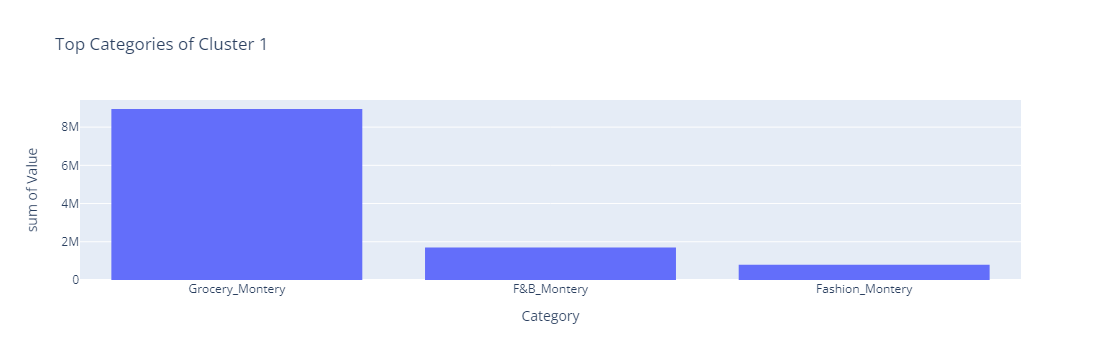

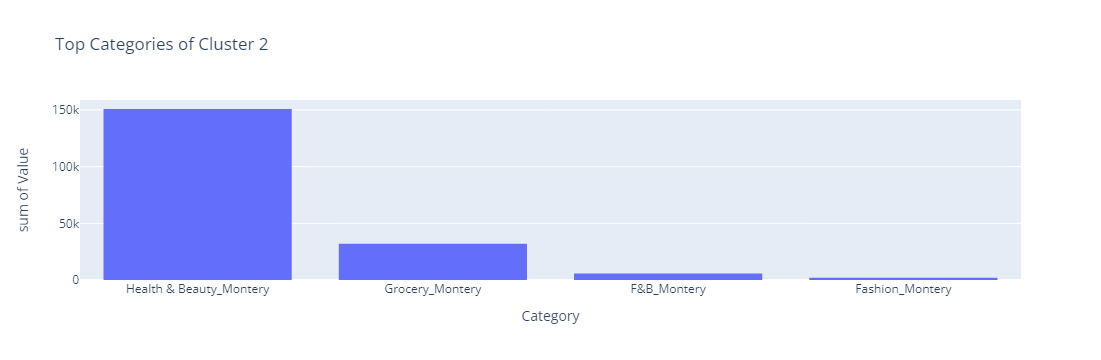

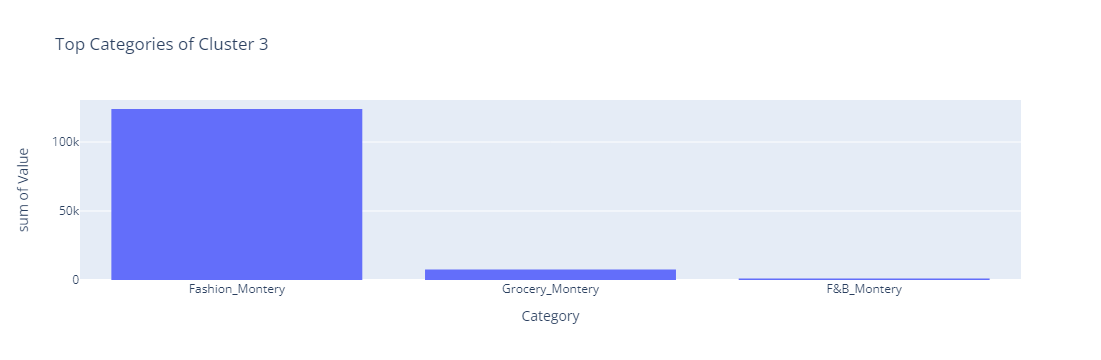

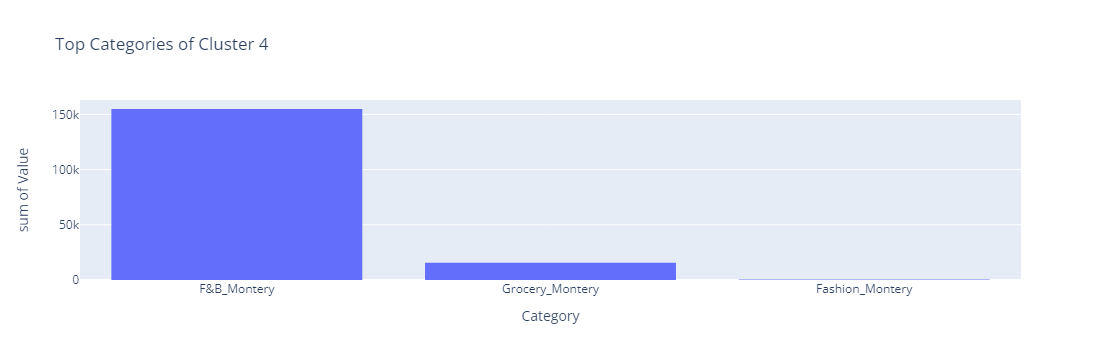

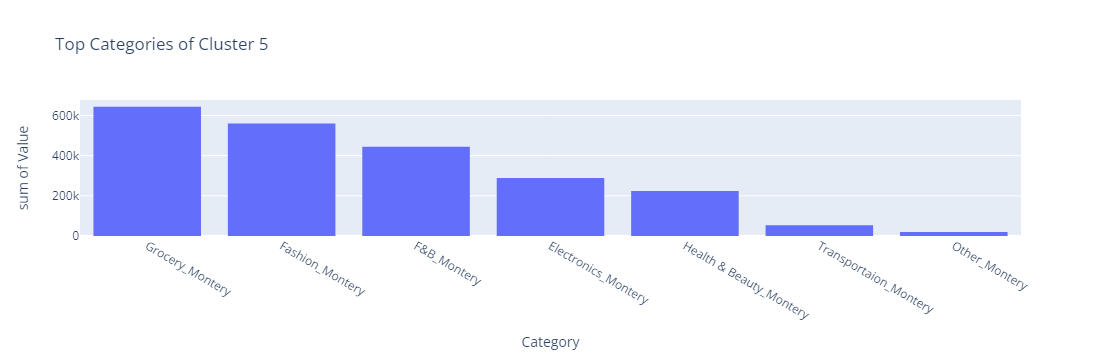

In [85]:
for cluster in pivot_total["Cluster"].unique().tolist():
    Get_Categories(cluster,pivot_total)

In [98]:
pivot_total

Category In English  Electronics_Frequency  F&B_Frequency  Fashion_Frequency  \
User_Id                                                                        
0                                      0.0            1.0                0.0   
1                                      0.0            0.0                1.0   
2                                      0.0            1.0                0.0   
3                                      0.0            0.0                1.0   
4                                      0.0            0.0                0.0   
...                                    ...            ...                ...   
33514                                  0.0            0.0                0.0   
33515                                  0.0            1.0                0.0   
33516                                  0.0            0.0                0.0   
33517                                  0.0            0.0                0.0   
33518                                  0.0            1.0                0.0   

Category In English  Grocery_Frequency  Health & Beauty_Frequency  \
User_Id                                                             
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  1.0                        0.0   
...                                ...                        ...   
33514                              3.0                        0.0   
33515                              0.0                        0.0   
33516                              1.0                        0.0   
33517                              1.0                        0.0   
33518                              2.0                        0.0   

Category In English  Other_Frequency  Transportaion_Frequency  \
User_Id                                                         
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   
...                              ...                      ...   
33514                            0.0                      0.0   
33515                            0.0                      0.0   
33516                            0.0                      0.0   
33517                            0.0                      0.0   
33518                            0.0                      0.0   

Category In English  Electronics_Montery  F&B_Montery  Fashion_Montery  ...  \
User_Id                                                                 ...   
0                                    0.0        442.7              0.0  ...   
1                                    0.0          0.0            249.0  ...   
2                                    0.0        300.0              0.0  ...   
3                                    0.0          0.0            162.0  ...   
4                                    0.0          0.0              0.0  ...   
...                                  ...          ...              ...  ...   
33514                                0.0          0.0              0.0  ...   
33515                                0.0         48.0              0.0  ...   
33516                                0.0          0.0              0.0  ...   
33517                                0.0          0.0              0.0  ...   
33518                                0.0        196.0              0.0  ...   

Category In English  Other_Montery  Transportaion_Montery  \
User_Id                                                     
0                              0.0                    0.0   
1   

In [99]:
pivot_total.reset_index(inplace = True)

In [100]:
df = pd.merge(left=pivot_total[["User_Id" , "Cluster"]] , right=df , on = "User_Id" )

In [101]:
df

User_Id  Cluster  Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age  \
0            0        1         1    4427    442.7      281           281   
1            1        1         1    2490    249.0       34            34   
2            2        1         1    3000    300.0      236           236   
3            3        1         1    1620    162.0      320           320   
4            4        1         1     700     70.0      407           407   
...        ...      ...       ...     ...      ...      ...           ...   
43645    33516        1         1    1320    132.0      256           256   
43646    33517        1         1    2100    210.0       13            13   
43647    33518        1         1    2180    218.0      225            55   
43648    33518        1         2    1540    154.0       55            55   
43649    33518        1         1    1960    196.0      449            55   

      Category In English                   Mer_Name  log_Trx_Vlu  \
0                     F&B    Jai Hind General Stores     6.092892   
1                 Fashion       Agra Appliance Arena     5.517453   
2                     F&B  Amritsar Auto Accessories     5.703782   
3                 Fashion       Agra Appliance Arena     5.087596   
4                 Grocery          Ranchi Rug Retail     4.248495   
...                   ...                        ...          ...   
43645             Grocery        Madurai Music Mania     4.882802   
43646             Grocery        Madurai Music Mania     5.347108   
43647             Grocery      Rajasthan Handicrafts     5.384495   
43648             Grocery      Rajasthan Handicrafts     5.036953   
43649                 F&B        Varanasi Silk House     5.278115   

      customers_statues  Trx_Age_Bins  
0            not active          7.69  
1                active         50.00  
2            not active          9.09  
3            not active          7.14  
4            not active          5.56  
...                 ...           ...  
43645        not active          9.09  
43646            active        100.00  
43647            active         10.00  
43648            active         33.33  
43649            active          5.00  

[43650 rows x 12 columns]

In [102]:
def Get_Recommendation(User , dataframe , num_of_recommendation) :
    Cluster = dataframe[dataframe["User_Id"] == User]["Cluster"].unique()[0]
    df_cluster = dataframe[dataframe["Cluster"] == Cluster]
    df_cluster = df_cluster.groupby("Mer_Name")["Trx_Vlu"].sum().nlargest(num_of_recommendation)
    for index , mer in enumerate(df_cluster.index):
        print(f"Recommendation number {index+1} of user {User} is {mer}")
        
    return df_cluster

In [103]:
Get_Recommendation(1,df , 3).index

Recommendation number 1 of user 1 is Rajasthan Handicrafts
Recommendation number 2 of user 1 is Saraswati Fabrics
Recommendation number 3 of user 1 is Madurai Music Mania


Index(['Rajasthan Handicrafts', 'Saraswati Fabrics', 'Madurai Music Mania'], dtype='object', name='Mer_Name')

In [104]:
df

User_Id  Cluster  Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age  \
0            0        1         1    4427    442.7      281           281   
1            1        1         1    2490    249.0       34            34   
2            2        1         1    3000    300.0      236           236   
3            3        1         1    1620    162.0      320           320   
4            4        1         1     700     70.0      407           407   
...        ...      ...       ...     ...      ...      ...           ...   
43645    33516        1         1    1320    132.0      256           256   
43646    33517        1         1    2100    210.0       13            13   
43647    33518        1         1    2180    218.0      225            55   
43648    33518        1         2    1540    154.0       55            55   
43649    33518        1         1    1960    196.0      449            55   

      Category In English                   Mer_Name  log_Trx_Vlu  \
0                     F&B    Jai Hind General Stores     6.092892   
1                 Fashion       Agra Appliance Arena     5.517453   
2                     F&B  Amritsar Auto Accessories     5.703782   
3                 Fashion       Agra Appliance Arena     5.087596   
4                 Grocery          Ranchi Rug Retail     4.248495   
...                   ...                        ...          ...   
43645             Grocery        Madurai Music Mania     4.882802   
43646             Grocery        Madurai Music Mania     5.347108   
43647             Grocery      Rajasthan Handicrafts     5.384495   
43648             Grocery      Rajasthan Handicrafts     5.036953   
43649                 F&B        Varanasi Silk House     5.278115   

      customers_statues  Trx_Age_Bins  
0            not active          7.69  
1                active         50.00  
2            not active          9.09  
3            not active          7.14  
4            not active          5.56  
...                 ...           ...  
43645        not active          9.09  
43646            active        100.00  
43647            active         10.00  
43648            active         33.33  
43649            active          5.00  

[43650 rows x 12 columns]

In [106]:
df.to_csv('clusteredData.csv', index=False)  

In [107]:
pivot_total.to_csv('Clustered_pivot.csv', index=False)  

In [110]:
%%writefile app.py


import streamlit as st 
import numpy as np
import pandas as pd


df = pd.read_csv("clusteredData.csv")
pivot_total = pd.read_csv("Clustered_pivot.csv")

def get_Recommendation(User,num_of_rec) :
    Cluster = df[df["User_Id"] == int(User)]["Cluster"].unique()[0]
    df_cluster = df[df["Cluster"] == Cluster]
    df_cluster = df_cluster.groupby("Mer_Name")["Trx_Vlu"].sum().nlargest(int(num_of_rec))
    for index , mer in enumerate(df_cluster.index):
        st.text(f"Recommendation number {index+1} of user {User} is {mer}")
        
def main():
    User = st.text_input("Enter User Name")
    num_of_rec = st.text_input("Enter num of Rec")
    if st.button("recommend"):
        get_Recommendation(User , num_of_rec)
main()

Overwriting app.py
